# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 5 - Normalización**
---

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,20)
pd.options.display.max_columns = None 

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.  

In [4]:
df = pd.read_csv("datos/soci_econ_country_profiles_resumido.csv", index_col = 0)
df.head(2)

country        region  restaurant_price_index  \
0  Argentina  SouthAmerica                   50.37   
1  Australia       Oceania                   77.12   

   population_in_thousands_(2017)  employment:_agriculture_(%_of_employed)  \
0                         44271.0                                      2.0   
1                         24451.0                                      2.7   

   employment:_industry_(%_of_employed)  employment:_services_(%_of_employed)  \
0                                  24.8                                  73.1   
1                                  21.2                                  76.1   

   education:_government_expenditure_(%_of_gdp)  quality_of_life_index  \
0                                           5.3                 139.59   
1                                           5.2                 176.54   

   purchasing_power_index  safety_index  cost_of_living  \
0                   58.40         37.37           52.57   
1                  101.94         57.58           80.66   

   consumer_price_index_(2010_=_100)  human_capital_index_(hci)_(scale_0-1)  \
0                         112.887108                                  0.611   
1                         115.686785                                  0.803   

   inflation,_consumer_prices_(annual_%)  \
0                               2.834056   
1                               1.948647   

   urban_population_(%_of_total_population)_y  \
0                                      91.749   
1                                      85.904   

   population_age_distribution_(0-14_years,_%)  \
0                                         24.9   
1                                         19.0   

   population_age_distribution_(60+_years,_%)  \
0                                        15.4   
1                                        21.0   

   international_migrant_stock_(%_of_total_pop.)  
0                                            4.8  
1                                           28.2

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:  

- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste  

 ## Normalización de la variable respuesta con el método manual ## 

In [17]:
media = df["restaurant_price_index"].mean()
maximo = df["restaurant_price_index"].max() 
minimo = df["restaurant_price_index"].min()

In [18]:
df["restaurant_price_index_normal"] = (df["restaurant_price_index"] - media) / (maximo - minimo )

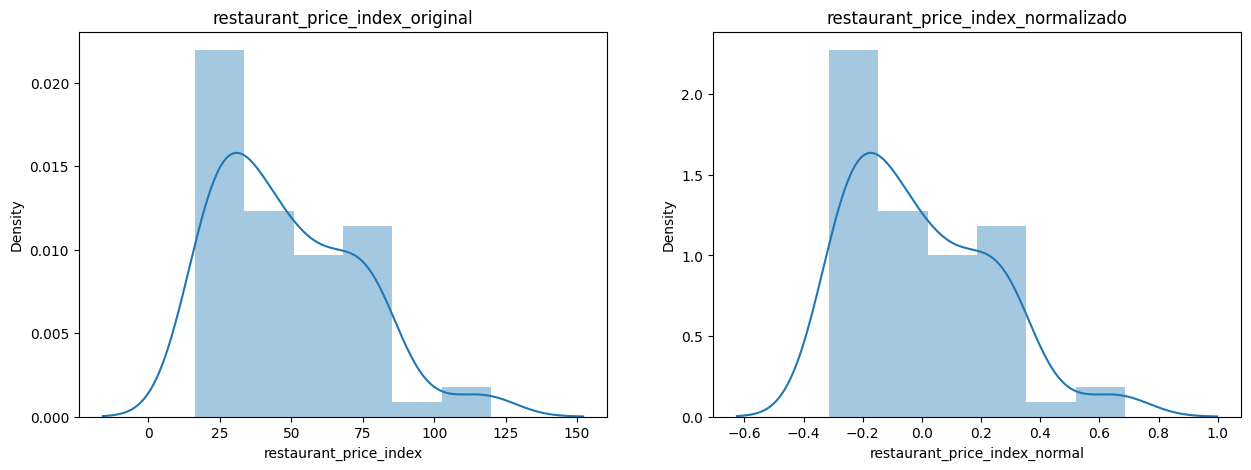

In [19]:

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('restaurant_price_index_original')
axes[1].set_title('restaurant_price_index_normalizado')

sns.distplot(df['restaurant_price_index'] ,ax = axes[0])
sns.distplot(df['restaurant_price_index_normal'], ax = axes[1]);

In [20]:
stats.shapiro(df['restaurant_price_index_normal'])

ShapiroResult(statistic=0.9227616786956787, pvalue=0.0005270897527225316)

 ## Normalización de la variable respuesta con el método de transformación logarítmica ## 

In [21]:
df['restaurant_price_index_normal'] = df["restaurant_price_index"].apply(lambda x: np.log(x) if x > 0 else 0)

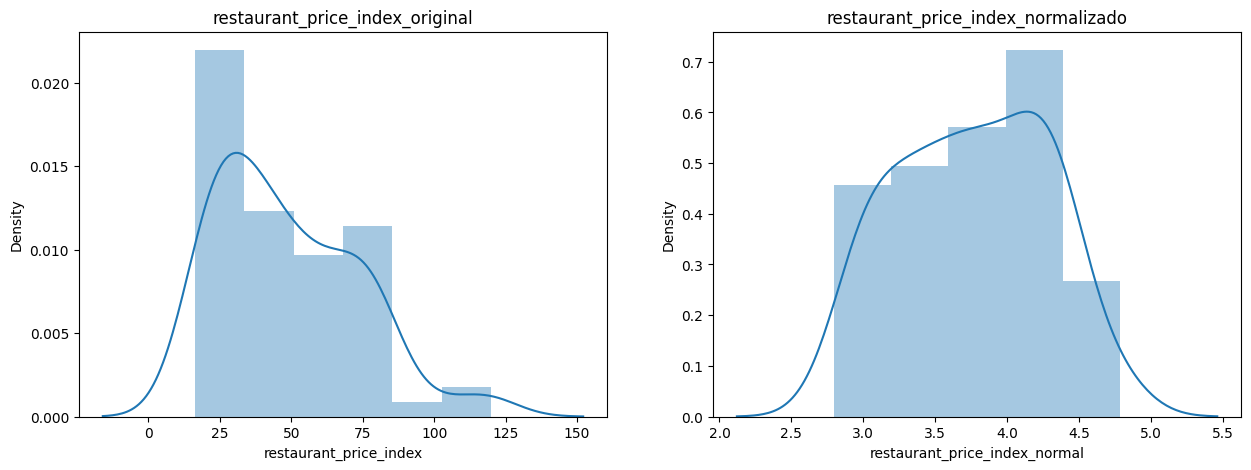

In [22]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('restaurant_price_index_original')
axes[1].set_title('restaurant_price_index_normalizado')

sns.distplot(df['restaurant_price_index'] ,ax = axes[0])
sns.distplot(df['restaurant_price_index_normal'], ax = axes[1]);

In [23]:
stats.shapiro(df['restaurant_price_index_normal'])

ShapiroResult(statistic=0.961199939250946, pvalue=0.03725201264023781)

 ## normalización de la variable respuesta con el método de raíz cuadrada ## 

In [24]:
df['restaurant_price_index_normal'] = df['restaurant_price_index'].apply(lambda x: math.sqrt(x))

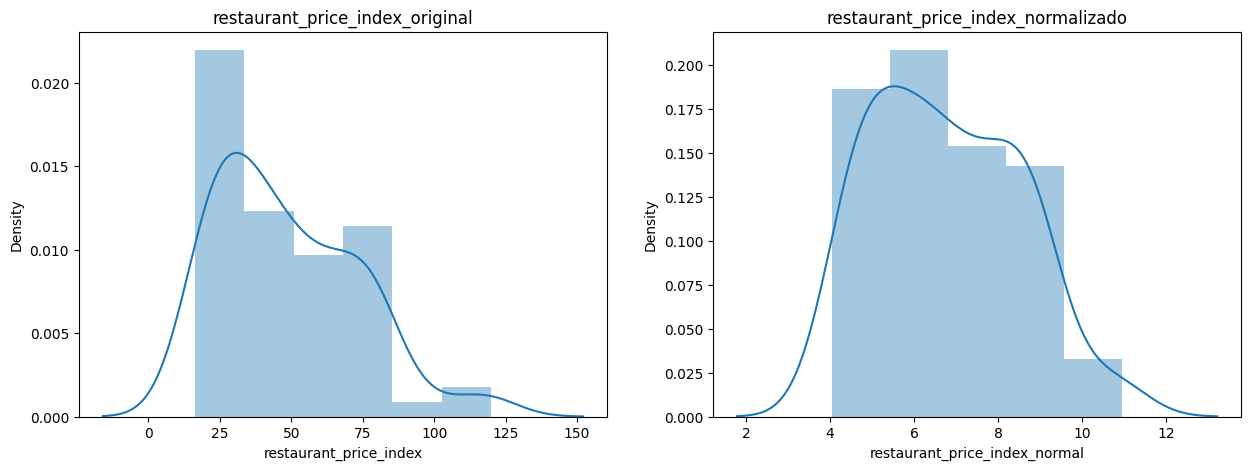

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('restaurant_price_index_original')
axes[1].set_title('restaurant_price_index_normalizado')

sns.distplot(df['restaurant_price_index'] ,ax = axes[0])
sns.distplot(df['restaurant_price_index_normal'], ax = axes[1]);

In [26]:
stats.shapiro(df['restaurant_price_index_normal'])

ShapiroResult(statistic=0.9544364213943481, pvalue=0.01651299186050892)

 ## Normalización de la variable respuesta con el método MinMaxScaler ## 

In [27]:
minmax = MinMaxScaler()

In [28]:
minmax.fit(df[['restaurant_price_index']])

MinMaxScaler()

In [29]:
X_normalizadas = minmax.transform(df[["restaurant_price_index"]])

In [30]:
X_normalizadas.min(axis=0)

array([0.])

In [31]:
X_normalizadas.max(axis=0)

array([1.])

In [32]:
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["restaurant_price_index_normal"])
numericas_minmax.head(2)

restaurant_price_index_normal
0                       0.328501
1                       0.587030

In [33]:
df["restaurant_price_index_normal"] = numericas_minmax
df.head(2)

country        region  restaurant_price_index  \
0  Argentina  SouthAmerica                   50.37   
1  Australia       Oceania                   77.12   

   population_in_thousands_(2017)  employment:_agriculture_(%_of_employed)  \
0                         44271.0                                      2.0   
1                         24451.0                                      2.7   

   employment:_industry_(%_of_employed)  employment:_services_(%_of_employed)  \
0                                  24.8                                  73.1   
1                                  21.2                                  76.1   

   education:_government_expenditure_(%_of_gdp)  quality_of_life_index  \
0                                           5.3                 139.59   
1                                           5.2                 176.54   

   purchasing_power_index  safety_index  cost_of_living  \
0                   58.40         37.37           52.57   
1                  101.94         57.58           80.66   

   consumer_price_index_(2010_=_100)  human_capital_index_(hci)_(scale_0-1)  \
0                         112.887108                                  0.611   
1                         115.686785                                  0.803   

   inflation,_consumer_prices_(annual_%)  \
0                               2.834056   
1                               1.948647   

   urban_population_(%_of_total_population)_y  \
0                                      91.749   
1                                      85.904   

   population_age_distribution_(0-14_years,_%)  \
0                                         24.9   
1                                         19.0   

   population_age_distribution_(60+_years,_%)  \
0                                        15.4   
1                                        21.0   

   international_migrant_stock_(%_of_total_pop.)  \
0                                            4.8   
1                                           28.2   

   restaurant_price_index_normal  
0                       0.328501  
1                       0.587030

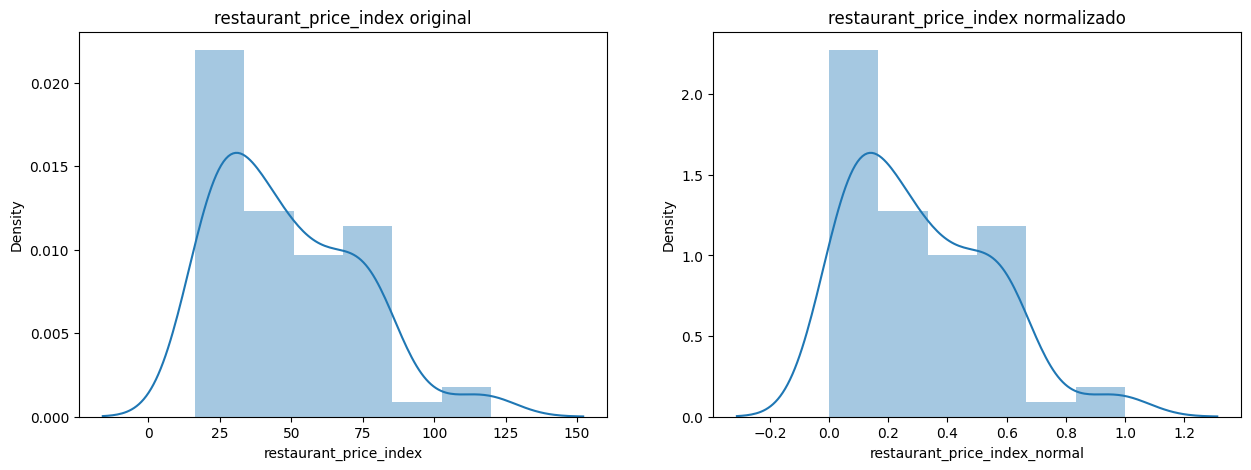

In [35]:

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('restaurant_price_index original')
axes[1].set_title('restaurant_price_index normalizado')

sns.distplot(df['restaurant_price_index'] ,ax = axes[0])
sns.distplot(df['restaurant_price_index_normal'], ax = axes[1]);

In [36]:
stats.shapiro(df['restaurant_price_index_normal'])

ShapiroResult(statistic=0.9227616786956787, pvalue=0.0005270897527225316)

 ## Normalización de la variable respuesta con el método boxcox ## 

In [5]:
# normalización de la variable respuesta con el método boxcox

df['restaurant_price_index_normal'], lambda_ajustada = stats.boxcox(df['restaurant_price_index'])


In [7]:
lambda_ajustada 

0.040388734954840855

In [6]:
df

country             region  \
0                            Argentina       SouthAmerica   
1                            Australia            Oceania   
2                              Austria      WesternEurope   
3                              Belarus      EasternEurope   
4                              Belgium      WesternEurope   
..                                 ...                ...   
61                United Arab Emirates        WesternAsia   
62                      United Kingdom     NorthernEurope   
63            United States of America    NorthernAmerica   
64  Venezuela (Bolivarian Republic of)       SouthAmerica   
65                             Vietnam  South-easternAsia   

    restaurant_price_index  population_in_thousands_(2017)  \
0                    50.37                         44271.0   
1                    77.12                         24451.0   
2                    66.94                          8736.0   
3                    37.60                          9468.0   
4                    82.34                         11429.0   
..                     ...                             ...   
61                   63.92                          9400.0   
62                   76.84                         66182.0   
63                   70.02                        324460.0   
64                   37.34                         31977.0   
65                   20.46                         95541.0   

    employment:_agriculture_(%_of_employed)  \
0                                       2.0   
1                                       2.7   
2                                       4.7   
3                                       9.6   
4                                       1.2   
..                                      ...   
61                                      3.5   
62                                      1.2   
63                                      1.5   
64                                     11.9   
65                                     41.8   

    employment:_industry_(%_of_employed)  \
0                                   24.8   
1                                   21.2   
2                                   25.6   
3                                   32.0   
4                                   21.2   
..                                   ...   
61                                  21.1   
62                                  18.4   
63                                  17.2   
64                                  26.8   
65                                  22.9   

    employment:_services_(%_of_employed)  \
0                                   73.1   
1                                   76.1   
2                                   69.7   
3                                   58.4   
4                                   77.6   
..                                   ...   
61                                  75.4   
62                                  80.4   
63                                  81.3   
64                                  61.3   
65                                  35.2   

    education:_government_expenditure_(%_of_gdp)  quality_of_life_index  \
0                                       5.300000                 139.59   
1                                       5.200000                 176.54   
2                                       5.500000                 190.37   
3                                       4.900000                 119.23   
4                                       6.600000                 160.52   
..                                           ...                    ...   
61                                    -99.000000                 139.27   
62                                      5.700000                 172.87   
63                                      5.400000                 179.73   
64                                     -0.210554                   0.00   
65                                      5.700000                  36.12   

    purchasing_power_index  s

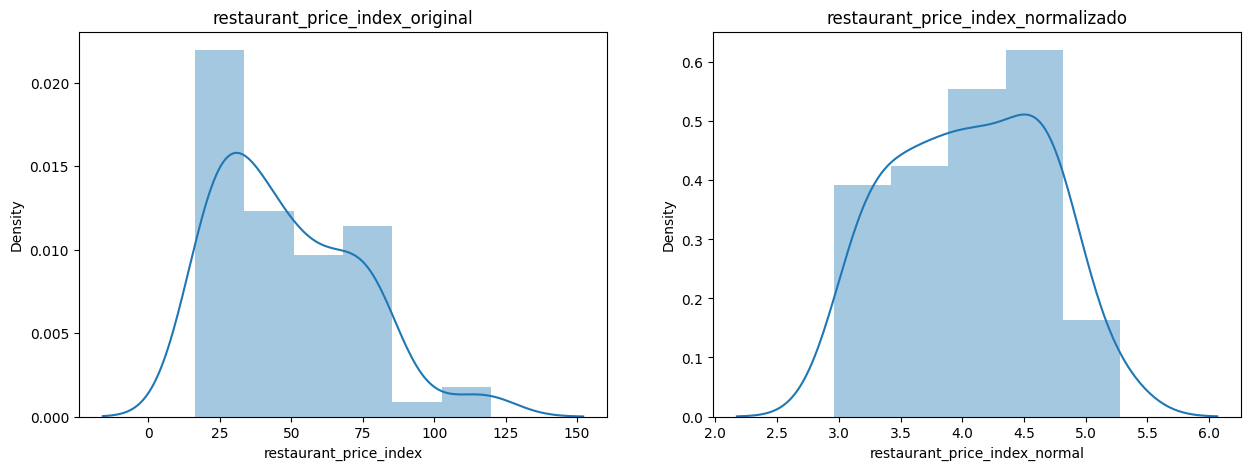

In [16]:

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('restaurant_price_index_original')
axes[1].set_title('restaurant_price_index_normalizado')

sns.distplot(df['restaurant_price_index'] ,ax = axes[0])
sns.distplot(df['restaurant_price_index_normal'], ax = axes[1]);

In [13]:
stats.shapiro(df['restaurant_price_index_normal'])

ShapiroResult(statistic=0.9615535736083984, pvalue=0.03889439254999161)

Aunque con el método boxcox nos hayamos acercado del la curva normal, el pvalue sigue siendo < 0.05, lo que sugiere que los datos no son normales. También lo hemos probado con los otros métodos, pero el pvalue sigue siendo < 0.05. 

- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [37]:
df.to_csv('datos/soci_econ_country_profiles_normalizado.csv')